In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
def scatter_plot(data, label, title, w=[]):
    cat1_x, cat1_y = [], []
    cat2_x, cat2_y = [], []
    
    for i, feature in enumerate(data):
        if label[i] == 0:
            cat1_x.append(feature[0])
            cat1_y.append(feature[1])
        else:
            cat2_x.append(feature[0])
            cat2_y.append(feature[1])
    
    #plt.scatter(cat0_x, cat0_y, c='r')
    plt.scatter(cat1_x, cat1_y, c='r', marker='D', label='class 0')
    plt.scatter(cat2_x, cat2_y, c='b', marker='^', label='class 1 and 2')
    if w != []:
        line_x = np.linspace(4, 8, 100)
        line_y = -(w[0] * line_x + w[2]) / w[1]
        plt.plot(line_x, line_y, 'k', label='decision boundary')
    plt.legend()
    plt.grid()
    plt.title(title)

In [2]:
cov_mat = [[0.09, 0.08], [0.08, 0.09]]

def data_generation():
    '''
    Generate two groups of data based on 2D normal distribution
    
    Returns
    -------
    X: data as features for training
    y: labels has value 0 or 1
    '''
    n, dim = 100, 2
    pos = np.random.multivariate_normal(mean=[1, 1], cov=cov_mat, size=n)
    neg = np.random.multivariate_normal(mean=[1.5, 0.5], cov=cov_mat, size=n)
    X = np.r_[pos, neg]
    y = np.hstack((np.zeros(n), np.ones(n))).astype(np.int)
    print(y.shape)
    return X, y

class Perceptron(object):
    
    def __init__(self, learning_rate, epoch):
        self.learning_rate = learning_rate
        self.max_iteration = epoch
        
    # WRONG implementation  
    def train(self, features, labels):
        '''
        The weight matrix is initailized here
        as its shape depends on dimension of features
        '''
        self.w = np.random.randn(features[0].shape[0] + 1)
        #self.w = np.zeros(features[0].shape[0] + 1)
        
        
        bingo, iteration = 0, 0
        
        while iteration < self.max_iteration:
            index = np.random.randint(0, labels.shape[0] - 1)  # generate random index to shuffle the training set
            x = np.hstack((features[index], np.ones(1)))
            y = 2 * labels[index] - 1
            wx = sum(self.w * x)
            
            if wx * y <= 0:
                for i in range(self.w.shape[0]):
                    self.w += self.learning_rate * (y * x [i])

            iteration += 1
        print("Iteration: ", iteration)
    
    def train_all(self, features, labels):
        
        self.w = np.random.randn(features[0].shape[0] + 1) # initialize weight matrix w with bias b
        
        for epoch in range(self.max_iteration):
            bingo = 0
            for i in range(len(features)):
                x = np.hstack((features[i], np.ones(1)))
                y = 2 * labels[i] - 1
                wx = sum(self.w * x)       # calculate wX_i + b
                
                if wx * y > 0:
                    bingo += 1
                else:
                    self.w += self.learning_rate * (y * x)
            print("Epoch {}, Bingo {}".format(epoch+1, bingo))
    
    def predict_one(self, x):
        x = np.hstack((x, np.ones(1)))
        return int( sum(self.w * x) >0 )
        
    def predict(self, features):
        labels = []
        for feature in features:
            x = list(feature)
            x.append(1)
            labels.append(self.predict_one(x))
        return labels



class dual_Perceptron(object):
    
    def __init__(self, learning_rate, epoch):
        self.learning_rate = learning_rate
        self.max_iteration = epoch
    
    def dual_train(self, features, labels):
        
        self.alpha, self.b = np.zeros(features.shape[0]), 0
        
        gram = []
        for i in range(len(features)):
            temp = [np.dot(features[i], features[j]) for j in range(len(features))]
            gram.append(temp)
        
        print(len(gram[0]))
        
        for epoch in range(self.max_iteration):
            bingo = 0
            for i in range(len(features)):
                y_i = 2 * labels[i] - 1
                cal = (np.sum(self.alpha * labels * gram[i]) + self.b) * y_i
                if cal > 0:
                    bingo += 1
                else:
                    self.alpha[i] += self.learning_rate
                    self.b += + self.learning_rate * y_i
            print("Epoch {}, Bingo {}".format(epoch+1, bingo))
    
    def predict_one(self, x, features, labels):
        temp_dot = np.array([np.dot(features[i], x) for i in range(len(features))])
        return int(np.sum(self.alpha * labels * temp_dot) + self.b > 0)
    
    def predict(self, x):
        labels = []
        for feature in features:
            labels.append(self.predict_one(feature))
        return labels

In [3]:
X, y = data_generation()

(200,)


In [4]:
p = Perceptron(0.0005, 30)
p.train_all(X, y)

Epoch 1, Bingo 100
Epoch 2, Bingo 100
Epoch 3, Bingo 107
Epoch 4, Bingo 129
Epoch 5, Bingo 153
Epoch 6, Bingo 169
Epoch 7, Bingo 178
Epoch 8, Bingo 184
Epoch 9, Bingo 186
Epoch 10, Bingo 189
Epoch 11, Bingo 191
Epoch 12, Bingo 191
Epoch 13, Bingo 193
Epoch 14, Bingo 193
Epoch 15, Bingo 194
Epoch 16, Bingo 195
Epoch 17, Bingo 195
Epoch 18, Bingo 195
Epoch 19, Bingo 196
Epoch 20, Bingo 195
Epoch 21, Bingo 195
Epoch 22, Bingo 195
Epoch 23, Bingo 195
Epoch 24, Bingo 196
Epoch 25, Bingo 196
Epoch 26, Bingo 196
Epoch 27, Bingo 196
Epoch 28, Bingo 196
Epoch 29, Bingo 196
Epoch 30, Bingo 196


[ 1.07585279 -0.73653357 -0.95010303]
1


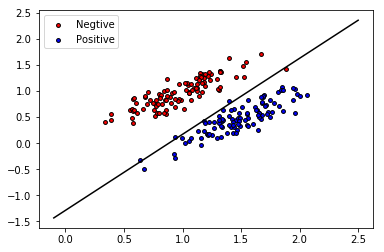

In [5]:
plt.scatter(X[y==0,0], X[y==0, 1], c = 'r', edgecolor='k', s=15, label='Negtive')
plt.scatter(X[y==1,0], X[y==1, 1], c = 'b', edgecolor='k', s=15, label='Positive')
plain_x1 = np.linspace(-0.1, 2.5, 100)
plain_x2 = - (p.w[2] + p.w[0] * plain_x1) / p.w[1]
plt.plot(plain_x1, plain_x2, 'k-')
plt.legend()
print(p.w)
unknown = np.array([2.0, 0.5])
print(p.predict_one(unknown))

In [6]:
p1 = dual_Perceptron(0.001, 60)
p1.dual_train(X,y)
""" WTF!? why the correction prediction become less and less """

200
Epoch 1, Bingo 198
Epoch 2, Bingo 194
Epoch 3, Bingo 188
Epoch 4, Bingo 180
Epoch 5, Bingo 174
Epoch 6, Bingo 171
Epoch 7, Bingo 169
Epoch 8, Bingo 165
Epoch 9, Bingo 164
Epoch 10, Bingo 165
Epoch 11, Bingo 165
Epoch 12, Bingo 163
Epoch 13, Bingo 163
Epoch 14, Bingo 163
Epoch 15, Bingo 163
Epoch 16, Bingo 164
Epoch 17, Bingo 164
Epoch 18, Bingo 163
Epoch 19, Bingo 162
Epoch 20, Bingo 163
Epoch 21, Bingo 163
Epoch 22, Bingo 162
Epoch 23, Bingo 162
Epoch 24, Bingo 163
Epoch 25, Bingo 163
Epoch 26, Bingo 163
Epoch 27, Bingo 163
Epoch 28, Bingo 164
Epoch 29, Bingo 164
Epoch 30, Bingo 164
Epoch 31, Bingo 165
Epoch 32, Bingo 164
Epoch 33, Bingo 165
Epoch 34, Bingo 165
Epoch 35, Bingo 164
Epoch 36, Bingo 165
Epoch 37, Bingo 166
Epoch 38, Bingo 166
Epoch 39, Bingo 166
Epoch 40, Bingo 167
Epoch 41, Bingo 168
Epoch 42, Bingo 167
Epoch 43, Bingo 168
Epoch 44, Bingo 168
Epoch 45, Bingo 168
Epoch 46, Bingo 168
Epoch 47, Bingo 169
Epoch 48, Bingo 170
Epoch 49, Bingo 169
Epoch 50, Bingo 170
Epoch

' WTF!? why the correction prediction become less and less '

In [25]:
unknown = np.array([1.0, 0.0])
p1.predict_one(unknown, X, y)

0